In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
L = 1.5 # длина в м
R = 1.5 # радиус
E = 7e10  # модуль Юнга
ro = 2700  # плотоность алюминия
ro_air = 0.4135  # на высоте 10км
nu = 0.33  # коэффицент Пуассона
G = E / (2 * (1 + nu))  # модуль сдвига
h = 0.0015   # тодщина пластины
D = (E * h ** 3) / (12 * (1 - nu ** 2))  # жесткость из уравнения колебания
beta = 0.01 # - коэф потерь
c = 299.6 # на высоте 10 км

In [3]:
df = pd.read_csv('interpol.csv')

In [4]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: str(x).replace(',', '.'))
    df[col] = df[col].astype(float)
    
df = df.interpolate()
df['w'] = 2 * np.pi * df['Freq']

In [5]:
def f_ot_beta(Uph, lam1, lam2, w):
    k_q = w / Uph
    kappa_sq = w * np.sqrt(ro * h / D)
    bheta = k_q ** 2 / kappa_sq
    a1 = 1 / (k_q * lam1)
    a2 = 1 / (k_q * lam2)
    a3 = bheta * (1 - a1 ** 2) - 1
    a4 = np.sqrt(a3 ** 2 + 4 * (a1 * bheta) ** 2)
    a5 = bheta * a2 ** 2 - a3
    a6 = np.sqrt(a5 ** 2 + 4 * (a1 * bheta) ** 2)
    
    # f = mult * [sl1 + num / den]
    
    mult = (np.sqrt(bheta) * a2) / (np.sqrt(2) * a4 * a6 ** 2)
    sl1 = a5 * np.sqrt(a4 - a3) - 2 * a1 * bheta * np.sqrt(a4 + a3)
    num = np.sqrt(2) * a1 * a4 * (a5 + 2 * bheta)
    den = a2 * np.sqrt(1 + bheta * a2 ** 2)
    return mult * (sl1 + num / den)

In [6]:
def phi(p_sq, Uph, lam1, lam2, w):
    phi_q = p_sq / (0.23 * w)
    return phi_q * f_ot_beta(Uph, lam1, lam2, w) / (2 * ro_air * h * w)

In [7]:
def get_params(ind):
    return dict(df.iloc[ind])

In [8]:
f = np.array([phi(p_sq, Uph, lam1, lam2, w) for _, _, p_sq, Uph, lam1, lam2, w in (get_params(i).values() for i in range(len(df)))])

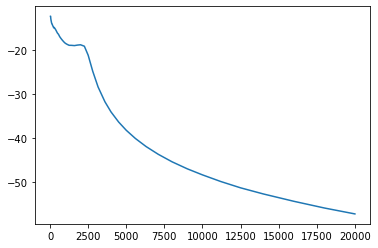

In [32]:
plt.plot(df['Freq'], 10 * np.log10(f))

In [9]:
res = [148.1944187794283,
 10.397197739692617,
 49.90179359916415,
 236.39075356833078,
 940.9889005786907,
 53399.171616309075,
 3919.21996272764,
 3283.7993908397666,
 114.87695591808706,
 63.354969534114794,
 59.75715863820334,
 81.96829854190929,
 602.9549049504076,
 14072.15513347195,
 84493.74804236565,
 17607.109660356517,
 1495.0726070950802,
 6002.4093654366225,
 842.3973920240696,
 1158.7519158384796,
 4737.474594322634,
 717.4060056539191,
 1257.9099312087649,
 1066.27275535774,
 935.2226727200663,
 1272.3720691006097,
 1017.7136465366274,
 2007.5576518423768,
 647.2778470076863,
 605.2860556839487,
 142.47656554457149,
 117.93007762085215,
 193.05334951534533,
 285.73709339155454,
 159.4128518234902,
 137.11258572337996,
 83.92501391476357,
 21.99101870003508,
 12.658142040175674,
 18.35534086661026,
 8.151206955381781,
 3.44958244144771,
 2.734906664094457,
 0.8137640197290296,
 0.4291482363551017,
 1.7080346875200412,
 0.04508401731280353,
 0.09493516458035878,
 0.029618058204458963,
 0.013674120367798222,
 0.017826523107612426,
 0.010876425250797928,
 0.0018641553894873568,
 0.0028848525903450847,
 0.00033659330013948726,
 0.0005434890678122144,
 6.3345359128104e-05,
 0.00031092513168118216,
 2.078937583766292e-05,
 4.237186810701844e-05,
 2.393698158355481e-05,
 5.995181165648991e-06,
 3.263925801998402e-05,
 2.2701579022842645e-06]

In [10]:
import plotly.express as px

In [15]:
fig = px.line(x=df['Freq'], y=10 * np.log10(f))
fig.add_scatter(x=df['Freq'], y=10* np.log10(res))

In [ ]:
px.f